<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Основная-информация" data-toc-modified-id="Основная-информация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Основная информация</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Количество-сделанных-звонков-и-израсходованных-минут" data-toc-modified-id="Количество-сделанных-звонков-и-израсходованных-минут-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Количество сделанных звонков и израсходованных минут</a></span></li><li><span><a href="#Количество-отправленных-сообщений" data-toc-modified-id="Количество-отправленных-сообщений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Количество отправленных сообщений</a></span></li><li><span><a href="#Объём-израсходонного-интернет-трафика" data-toc-modified-id="Объём-израсходонного-интернет-трафика-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Объём израсходонного интернет-трафика</a></span></li><li><span><a href="#Выручка-с-каждого-пользователя" data-toc-modified-id="Выручка-с-каждого-пользователя-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выручка с каждого пользователя</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных-и-описание-данных" data-toc-modified-id="Анализ-данных-и-описание-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных и описание данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-различии-выручки-с-разных-тарифов" data-toc-modified-id="Гипотеза-о-различии-выручки-с-разных-тарифов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза о различии выручки с разных тарифов</a></span></li><li><span><a href="#Гипотеза-о-различии-выручки-с-разных-регионов" data-toc-modified-id="Гипотеза-о-различии-выручки-с-разных-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза о различии выручки с разных регионов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей

2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.



## Изучение данных из файла

### Основная информация

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st

In [2]:
# открываем csv-файл с нужными параметрами, таблица со звонками
calls = pd.read_csv('/datasets/calls.csv', sep=',', decimal='.')
display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков нет, значения в столбце call_date являются строковыми, можно будет перевести их в формат datetime. В столбце duration есть нулевые значения, но это не пропуски. Нулями здесь обозначены пропущенные звонки.

In [32]:
# открываем csv-файл с нужными параметрами, таблица с информацией об интернет-сессиях
internet = pd.read_csv('/datasets/internet.csv', sep=',', decimal='.')
internet.drop(['Unnamed: 0'], axis=1, inplace=True)
display(internet.head())
internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Пропусков нет, тип столбца session_date можно будет заменить на datetime, у других столбцов тип данных корректный.

In [4]:
# открываем csv-файл с нужными параметрами, таблица с смс
messages = pd.read_csv('/datasets/messages.csv', sep=',', decimal='.')
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Тип столбца message_date можно заменить на datetime, у остальных столбцов тип данных верный. 

In [5]:
# открываем csv-файл с нужными параметрами, таблица с тарифами
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',', decimal='.')
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Типы данных корректны. Вся информация в таблице соответствует описанию тарифов.

In [6]:
# открываем csv-файл с нужными параметрами, таблица с тарифами
users = pd.read_csv('/datasets/users.csv', sep=',', decimal='.')
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Тип столбца reg_date можно будет изменить на datetime, у других столбцов тип данных корректный. Столбец churn_date содердит всего 38 непропущенных значений, но здесь пропуски значат, что клиент всё ещё пользовался тарифом на момент сбора этих данных. 

### Вывод

В целом, данные не требуют сложной и долгой предобработки, потому что столбцов с пропусками немного и они все важны. Имена столбцов написаны корректно, а типы данных соответствуют данных в столбцах. Дополнительных действий требуют только столбцы с датами. 

## Предобработка данных

### Изменение типов данных

Сначала разберемся с типами данных столбцов с датами. Формат у каждого такого столбца одинаковый.

In [7]:
# изменим тип данных в столбцах с датами
date_format = '%Y-%m-%d'
calls['call_date'] = pd.to_datetime(calls['call_date'], format=date_format)
internet['session_date'] = pd.to_datetime(internet['session_date'], format=date_format)
messages['message_date'] = pd.to_datetime(messages['message_date'], format=date_format)
users['churn_date'] = pd.to_datetime(users['churn_date'], format=date_format)
users['reg_date'] = pd.to_datetime(users['reg_date'], format=date_format)

Тип данных изменён. Так же можно округлить количество минут в таблице со звонками в бОльшую сторону, а затем поменять тип данных на целочисленный.

In [8]:
# округлим каждое значение в столбце в большую сторону
calls['duration'] = np.ceil(calls['duration']).astype('int64')

### Количество сделанных звонков и израсходованных минут 

Теперь создадим таблицу с информацией о количесве сделанных звонков и и израсходованных минут по месяцам. Для этого сначала с таблице calls создадим новый столбец c месяцем.

In [9]:
# добавим новый столбец
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [10]:
# построим сводную таблицу для количества звонков по месяцам
calls_per_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='count').reset_index()

In [11]:
# построим сводную таблицу для количества потраченных минут по месяцам
minutes_per_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
minutes_per_month.head()

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


По таблицам видно, что многие пользователи начали пользоваться мобильными услугами оператора в 2018 году, месяцы до начала обслуживания заполнены пропусками. 


### Количество отправленных сообщений
Далее создадим таблицу с количеством отправленных сообщений по месяцам. Также создадим в таблице messages столбец month.

In [12]:
# добавим новый столбец
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [13]:
# построим сводную таблицу для количества звонков по месяцам
messages_per_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_per_month.head()

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Объём израсходонного интернет-трафика

Далее создадим таблицу с объёмом израсходонного интернет-трафика по месяцам. Каждое получившееся значение переведём в гигабайты и округлим до целого числа. Для начала создадим в таблице internet столбец month.

In [33]:
# добавим новый столбец
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [34]:
# построим сводную таблицу для количества звонков по месяцам
internet_per_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

In [16]:
# функция для перевода мегабайтов в целые гигабайты
def mb_to_gb(value):
    return np.ceil(value / 1024)

In [17]:
# применяем ко всем месяцам функцию
internet_per_month['mb_used'] = internet_per_month['mb_used'].apply(mb_to_gb)
internet_per_month.head()

mb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0

### Выручка с каждого пользователя

Все необходимые таблицы составлены. Теперь посчитаем, сколько каждый из клиентов потратил в месяц на оплату тарифа. Для начала объединим таблицы и затем посчитаем, сколько составила переплата за минуты, смс и гигабайты трафика. 

In [18]:
# соединяем таблицы методом merge
data = internet_per_month.merge(messages_per_month, on=['user_id', 'month'], how='outer')
data = data.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
data = data.merge(users, on='user_id', how='outer').rename(columns = {'tariff' : 'tariff_name'})
data = data.merge(tariffs, on='tariff_name', how='outer')

In [19]:
# переименовываем стоблцы
data.rename(columns={'mb_used': 'gb_used', 'id':'messages_used', 'duration': 'minutes_used'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
gb_used                  3203 non-null float64
messages_used            2717 non-null float64
minutes_used             3174 non-null float64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff_name              3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: d

In [37]:
data.shape

(3216, 8)

In [38]:
data.user_id.nunique()

500

В итоге получилась одна таблица со всей необходимой информацией. Каждая строчка в такой таблице содержит информацию о затратах каждого пользователя по месяцам. 

Для каждой строки мы можем сосчитать стоимость использования тарифа за каждый месяц.

In [20]:
# функция для подсчёта общей стоимости использования тарифа за месяц
def revenue(row):
    
    # переплата за минуты
    minutes_cost = 0
    if row['minutes_used'] > row['minutes_included']:
        minutes_cost = (row['minutes_used'] - row['minutes_included']) * row['rub_per_minute']
    
    # переплата за смс
    messages_cost = 0
    if row['messages_used'] > row['messages_included']:
        messages_cost = (row['messages_used'] - row['messages_included']) * row['rub_per_message']
    
    # переплат за гигабайты
    gb_cost = 0
    if row['gb_used'] > row['mb_per_month_included'] / 1024:
        gb_cost = (row['gb_used'] - row['mb_per_month_included'] / 1024) * row['rub_per_gb']
    
    # стоимость тарифа и переплаты 
    return minutes_cost + messages_cost + gb_cost + row['rub_monthly_fee']

In [21]:
# применяем функцию к каждой строке датафрейма
data['total_cost'] = data.apply(revenue, axis=1)
data.head()

,user_id,month,gb_used,messages_used,minutes_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_cost
0,1000,5.0,3.0,22.0,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,23.0,60.0,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,14.0,75.0,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,14.0,81.0,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,15.0,57.0,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [39]:
data['total_cost'].describe()

count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: total_cost, dtype: float64

In [22]:
data = data.loc[:, ['user_id', 'month', 'gb_used', 'messages_used', 'minutes_used', 'city', 'total_cost', 'tariff_name']]
data.head()

,user_id,month,gb_used,messages_used,minutes_used,city,total_cost,tariff_name
0,1000,5.0,3.0,22.0,159.0,Краснодар,1950.0,ultra
1,1000,6.0,23.0,60.0,172.0,Краснодар,1950.0,ultra
2,1000,7.0,14.0,75.0,340.0,Краснодар,1950.0,ultra
3,1000,8.0,14.0,81.0,408.0,Краснодар,1950.0,ultra
4,1000,9.0,15.0,57.0,466.0,Краснодар,1950.0,ultra


### Вывод

С помощью построения сводных таблиц по пользователям и месяцам получилась одна общая таблица с информацией о затратах каждого пользователя за каждый месяц пользования услуг сотовым оператором. Таблица включает информацию и о тарифе и о использованных минутах, сообщениях и гигабайтах. 

Такой формат таблицы будет удобен для дальнейшего анализа и построения графиков.

## Анализ данных и описание данных

Посмотрим, сколько минут тратят пользователи разных тарифов в месяц. 

In [23]:
# строим сводную таблицу по тарифам, считаем среднее, дисперсию и стандартное отклонение
data_pivot_tariffs = data.pivot_table(index=['tariff_name'], 
                                      values=['minutes_used', 'gb_used', 'messages_used'], 
                                      aggfunc=['mean', 'median', 'var', 'std'])
data_pivot_tariffs

mean                             median                \
               gb_used messages_used minutes_used gb_used messages_used   
tariff_name                                                               
smart        16.336176     38.716441   419.062978    17.0          34.0   
ultra        19.694359     61.161006   545.451104    19.0          51.0   

                                var                                   std  \
            minutes_used    gb_used messages_used  minutes_used   gb_used   
tariff_name                                                                 
smart              423.0  32.923756    717.594201  35844.189551  5.737923   
ultra              528.0  94.146734   2109.659183  94203.418396  9.702924   

                                        
            messages_used minutes_used  
tariff_name                             
smart           26.787949   189.325618  
ultra           45.931026   306.925754

In [40]:
data_pivot_tariffs.T

tariff_name                  smart         ultra
mean   gb_used           16.336176     19.694359
       messages_used     38.716441     61.161006
       minutes_used     419.062978    545.451104
median gb_used           17.000000     19.000000
       messages_used     34.000000     51.000000
       minutes_used     423.000000    528.000000
var    gb_used           32.923756     94.146734
       messages_used    717.594201   2109.659183
       minutes_used   35844.189551  94203.418396
std    gb_used            5.737923      9.702924
       messages_used     26.787949     45.931026
       minutes_used     189.325618    306.925754

По значениям средних и медианных значений можно сказать, что гистограмма используемых гигабайтов и минут тарифа "смарт" будут иметь почти нормальное распределение с небольшой отрицательной скошенностью, остальные графики будут иметь положительную скошенность. 

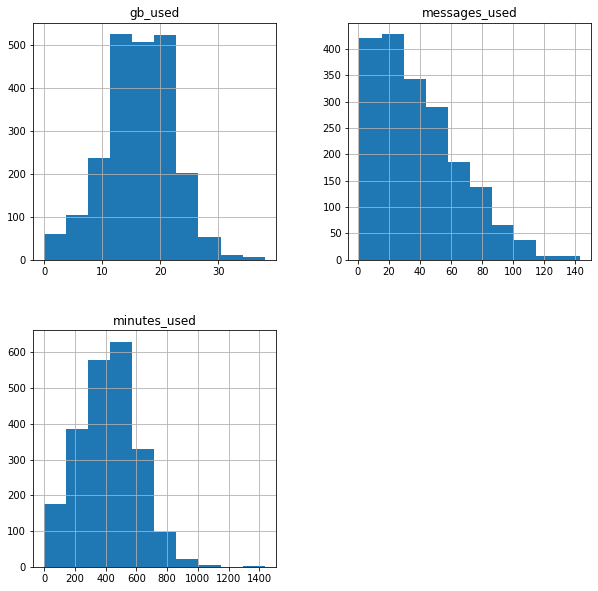

In [24]:
# построим гистограммы для тарифа "ультра"
data[['gb_used', 'messages_used', 'minutes_used', 'tariff_name']].query('tariff_name == \'smart\'').hist(figsize=(10,10))
plt.show()

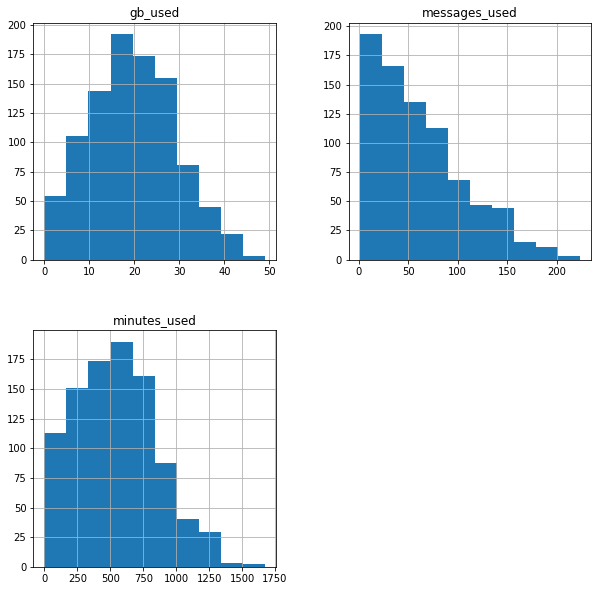

In [25]:
# построим гистограммы для тарифа "ультра"
data[['gb_used', 'messages_used', 'minutes_used', 'tariff_name']].query('tariff_name == \'ultra\'').hist(figsize=(10,10))
plt.show()

Все параметры имеют нормальное распределение, за исключением распределения сообщений пользователей. Большинство людей пишут очень мало смс, это можно видеть на графике. Это явление можно объяснить большой популярностью месседжеров. Об этом свидетельствуют и больше объёмы интернет трафика, которые предоставляют клиентам. 

Посмотри на средние значения котроые получились для кажого тарифа: 

In [26]:
display(data_pivot_tariffs['mean'])
display(tariffs[['tariff_name', 'mb_per_month_included', 'messages_included', 'minutes_included']])

,gb_used,messages_used,minutes_used
tariff_name,,,
smart,16.336176,38.716441,419.062978
ultra,19.694359,61.161006,545.451104


,tariff_name,mb_per_month_included,messages_included,minutes_included
0,smart,15360,50,500
1,ultra,30720,1000,3000


По этим таблицам можно увидеть, что в среднем пользователи тарифов укладываются в предоставленный лимит. Исключение составляет только использование интернет-трафика: в среднем клиенты переплачивают за два гигабайта. 

Так же мы можем увидеть, что среднее количество затраченных минут, смс и гигабайтов в обоих тарифах отличается не более, чем в два раза, тогда как лимиты в тарифе "ультра" больше в несколько раз лимитов тарифов "смарт". И это правильно, посколько среднее отклонение от этих средних величин в тарифе "ультра" намного больше. То есть разброс значений от среднего больше намного, чем в тарифе "смарт". 

## Проверка гипотез 

Проверим гипотезу о том, что выручка пользователей тарифов "смарт" и "ультра" различаются.

### Гипотеза о различии выручки с разных тарифов

Сформулируем нулевую и альтернативную гипотезы: 

**H0:** "Средняя выручка пользователей тарифов "смарт" и "ультра" равны."

**H1:** "Средняя выручка пользователей тарифов "смарт" и "ультра" различаются."

In [27]:
# проведём t-тест для сравнения средних двух выборок
alpha = .05
result = st.ttest_ind(data.query('tariff_name == \'smart\'')['total_cost'],
                      data.query('tariff_name == \'ultra\'')['total_cost'],
                      equal_var=False)
result.pvalue

1.927011394420941e-250

In [28]:
# сравним с установленным пороговым значением
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


In [29]:
print('Средняя выручка с тарифа "смарт":', data.query('tariff_name == \'smart\'')['total_cost'].mean(),
     '\nСредняя выручка с тарифа "ультра":', data.query('tariff_name == \'ultra\'')['total_cost'].mean())

Средняя выручка с тарифа "смарт": 1289.6417040358745 
Средняя выручка с тарифа "ультра": 2070.030425963489


По результатам проверки мы отвергаем нулевую гипотезу. Значение pvalue очень близко к нулю, поэтому даже если бы было установлено другое пороговое значение, гипотеза всё равно была бы отвергнута. Это значит, что с большей вероятностью средняя выручка с разных тарифов и правда отличается. 

Если посчитать среднюю выручку по по этим тарифам по всей выборке, то мы видим, что с тарифа "ультра" она больше. 

### Гипотеза о различии выручки с разных регионов

Проверим, отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов. 

Сформулируем нулевую и альтернативную гипотезы: 

**H0:** "Средняя выручка пользователей из Москвы и других регионов равны."

**H1:** "Средняя выручка пользователей из Москвы и других регионов различаются."

In [30]:
# проведём t-тест для сравнения средних двух выборок
alpha = .05
result = st.ttest_ind(data.query('city == \'Москва\'')['total_cost'],
                      data.query('city != \'Москва\'')['total_cost'],
                      equal_var=False)
result.pvalue

0.5216952110000278

In [31]:
# сравним с установленным пороговым значением
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Не получилось отвергнуть нулевую гипотезу


Результат t-теста показывает, что мы не можем отвергнуть нулевую гипотезу. Значение pvalue оказалось достаточно большим. Это значит, что вероятнее всего средняя выручка пользователей из Москвы и из других регионов не отличается.

## Общий вывод



Данные, представленные в пяти таблицах, нуждались в минимальной предобработке: требовалось только перевести даты в необходимый формат. Также для удобства были подсчитаны использованные минусы, смс и гигабайты каждого пользователя по месяцам. На основе этих данных подсчитывались расходы. Таким образом получилась одна основная сводная таблица, полученная путём объединения. 

В ходе исследования выяснилось, что в среднем пользователи тарифов укладываются в предоставленный лимит. Исключение составляет только использование интернет-трафика пользователями тарифа ультра. Основная переплата скорее всего бывает за дополнительные гигабайты. 

В ходе анализа были выдвинуты следующие гипотезы: 
* "Средняя выручка пользователей из Москвы и других регионов равны." - **гипотезу опровергли**

Средние значения выручки получились следующие: 
Средняя выручка с тарифа "смарт": 1289.64
Средняя выручка с тарифа "ультра": 2070.03
Можно сделать о том, что в основном тариф "ультра" приносит компании больше прибыли за месяц. То есть тариф "ультра" является для компании более выгодным.

* "Средняя выручка пользователей из Москвы и других регионов равны." - **гипотеза не опровергнута** 

То есть в большинстве случаев средняя выручка одинакова в регионах и в Москве. Значит компании не стоит делать акцент территорию проживания пользователей, потому что разницы нет. 